In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
#reading data
data = pd.read_csv('../input/heart.csv')

In [3]:
#recognizing features
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#info about features and target
data.info()

#there is no NaN value or not needed feature in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
data.describe()

#the values of features are needed to be normalized.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#preperation of data:

#y is target column
#x_data is feature set without normalization
y = data.target.values
x_data = data.drop(['target'], axis = 1)

In [7]:
#normalization of feature set
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [8]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

**LOGISTIC REGRESSION CLASSIFICATION**

In [9]:
#logistic regression classification model with sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42, max_iter = 150)
lr.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=150, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
#accuracy of the model
lr.score(x_test, y_test)

0.8524590163934426

In [11]:
#data scheme for confusion matrix
y_pred = lr.predict(x_test)
y_true = y_test

In [12]:
#confusion matrix model with sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[26,  3],
       [ 6, 26]])

**K-NEAREST NEIGHBOUR (KNN) CLASSIFICATION**

In [13]:
#KNN model with sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 18) #n_neighbors = K
knn.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=18, p=2,
           weights='uniform')

In [14]:
#accuracy of the model
knn.score(x_test, y_test)

0.8524590163934426

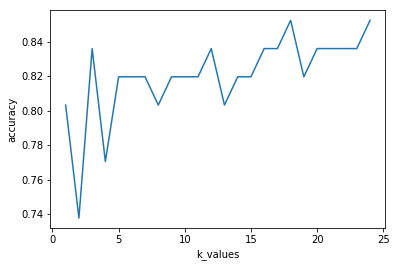

In [15]:
#KNN K-values evaluation results

score_list = []
for i in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
plt.plot(range(1,25), score_list)
plt.xlabel('k_values')
plt.ylabel('accuracy')
plt.show()

#n_neighbors should be 18

In [16]:
#data scheme for confusion matrix
y_pred = knn.predict(x_test)
y_true = y_test
#confusion matrix model with sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[27,  2],
       [ 7, 25]])

**SUPPORT VECTOR MACHINE (SVM) CLASSIFICATION**

In [17]:
#SVM model with sklearn
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
#accuracy of the model
svm.score(x_test, y_test)

0.8688524590163934

In [19]:
#data scheme for confusion matrix
y_pred = svm.predict(x_test)
y_true = y_test
#confusion matrix model with sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[26,  3],
       [ 5, 27]])

**NAIVE BAYES CLASSIFICATION**

In [20]:
#NAIVE BAYES model with sklearn
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
#accuracy of the model
nb.score(x_test, y_test)

0.8688524590163934

In [22]:
#data scheme for confusion matrix
y_pred = nb.predict(x_test)
y_true = y_test
#confusion matrix model with sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[26,  3],
       [ 5, 27]])

**DECISION TREE CLASSIFICATION**

In [23]:
#Decision Tree Classification model with sklearn
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
#accuracy of the model
dt.score(x_test, y_test)

0.819672131147541

In [25]:
#data scheme for confusion matrix
y_pred = dt.predict(x_test)
y_true = y_test
#confusion matrix model with sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[27,  2],
       [ 9, 23]])

**RANDOM FOREST CLASSIFICATION**

In [26]:
#Random Forest Classification model with sklearn
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [27]:
#accuracy of the model
rf.score(x_test, y_test)

0.8524590163934426

In [28]:
#data scheme for confusion matrix
y_pred = rf.predict(x_test)
y_true = y_test
#confusion matrix model with sklearn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[24,  5],
       [ 4, 28]])

**CONCLUSION**

In [29]:
L = [lr.score(x_test, y_test),knn.score(x_test, y_test),svm.score(x_test, y_test),nb.score(x_test, y_test),dt.score(x_test, y_test),rf.score(x_test, y_test)]
print('ACCURACY SCORES OF THE MODELS')
print('Linear Regression      : ',L[0].round(3))
print('KNN                    : ',L[1].round(3))
print('Support Vector Machine : ',L[2].round(3))
print('Naive Bayes            : ',L[3].round(3))
print('Decision Tree          : ',L[4].round(3))
print('Random Forest          : ',L[5].round(3))

ACCURACY SCORES OF THE MODELS
Linear Regression      :  0.852
KNN                    :  0.852
Support Vector Machine :  0.869
Naive Bayes            :  0.869
Decision Tree          :  0.82
Random Forest          :  0.852


In [30]:
# To sum up, 
# Confusion matrixes show there is no unbalanced situation.
# Support Vector Machine and Naive Bayes Classification Algorithms give the best results.

**I'm a new Data Science learner. Please comment me your feedbacks to help me improve myself. Thank you**
